In [1]:
# Lectura de librerías
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from plotnine import *
from skimpy import skim

In [2]:
# Lectura de datos
DEM_CARNE = pd.read_csv("data/DEM_CARNE.csv")

In [3]:
# Estadística descriptiva
DEM_CARNE.describe()

,P,Q,Y
count,30.000000,30.000000,30.000000
mean,8.373533,10.891567,409.418633
std,2.841277,6.671015,127.842689
min,4.016000,2.903000,184.798000
25%,6.555500,6.287750,320.382250
50%,7.737500,9.813000,385.925500
75%,10.523250,14.089500,485.449750
max,14.219000,33.908000,760.343000


In [4]:
skim(DEM_CARNE)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 30     │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 3      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ P                   │     0 │        0 │      8.4 │    2.8 │      4 │    6.6 │     11 │      14 │  ▅█▇▃▃▄  │  │
│ │ Q                   │     0 │        0 │       11 │    6.7 │    2.9 │    6.3 │     14 │      34 │  █▇▄▁ ▁  │  │
│ │ Y                   │     0 │        0 │      410 │    130 │    180 │    320 │    490 │     760 │  ▂█▆▅▂▁  │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴────────┴────────┴────────┴─────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

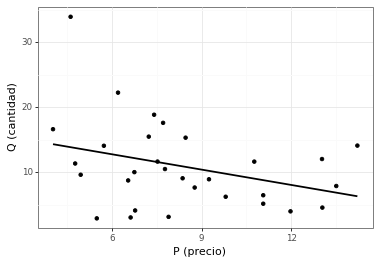

<ggplot: (286730808)>

In [5]:
# Gráficas
(ggplot(DEM_CARNE,aes('P','Q')) + geom_point() + geom_smooth(method='lm',se=False) + labs(x="P (precio)",y="Q (cantidad)") + theme_bw())

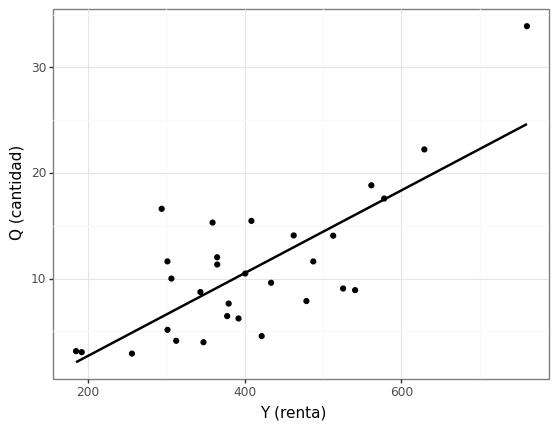

<ggplot: (329230153)>

In [6]:
(ggplot(DEM_CARNE,aes('Y','Q')) + geom_point() + geom_smooth(method='lm',se=False) + labs(x="Y (renta)",y="Q (cantidad)") + theme_bw())

In [7]:
# Regresión lineal
model = smf.ols(formula = "Q ~ P + Y", data = DEM_CARNE)
modelo_lineal = model.fit()
print(modelo_lineal.summary())

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     27.52
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.05e-07
Time:                        08:52:21   Log-Likelihood:                -82.324
No. Observations:                  30   AIC:                             170.6
Df Residuals:                      27   BIC:                             174.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3452      3.302      0.407      0.6